### NN Computer vision with Fashion MNIST from Zalando


#### Import   


In [34]:
import tensorflow as tf
from keras import layers

import matplotlib.pyplot as plt

#### Load Dataset

The main difference between loading image dataset with keras
instead of scikitLearn is that in keras, each of them is represented
as a 28x28 array rather than an array of size 784.
+
In keras, pixel intensities are represented as intergers from 0 to 255
instead of floats from 0.0 to 255.0


In [35]:
# Load fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

#### Load train and test data ( Total of 70_000 samples )

In [36]:
# Load train and test data
(x_fashion_train, y_fashion_train), (x_fashion_test, y_fashion_test) = fashion_mnist.load_data()

x_train, y_train = x_fashion_train / 255.0, y_fashion_train
x_test = x_fashion_test / 255.0

#### Fashion MNIST Labels

In [37]:
# Fashion MNIST Data Labels glossaire
# The first column is the label
class_names = [
    "T-shirt/top", # 0 
    "Trouser",     # 1
    "Pullover",    # 2
    "Dress",       # 3
    "Coat",        # 4
    "Sandal",      # 5
    "Shirt",       # 6
    "Sneaker",     # 7
    "Bag",         # 8
    "Ankle boot"   # 9
]

#### Building our NN

In [38]:
model = tf.keras.models.Sequential([

    # For preprocessing
    layers.Flatten(input_shape=[28,28]), # Transform 28x28 image data into 1D array because default is 2D

    # Creating hidden layer - Manages its own weight matrix with connections weight between neurons. 
    # It manages a Bias vector too * once per neuron

    # ReLU to make sure that everything is greater than 0 ( No negative numbers )
    
    layers.Dense(300, activation='relu'), # Create a Hidden Layer of 300 neurons
    layers.Dense(100, activation='relu'), # Create a Hidden Layer of 100 neurons

    # The Output Layer - Last Layer - 10 because there's 10 classnames ( So it will give us 10 probabilities - index from 0 to 9)
    layers.Dense(10, activation='softmax') # Normalize the Output with SoftMax
])

#### Compiling the model

In [39]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

#### Train the model


In [40]:
model.fit(
    x_train,
    y_train,
    1,          # Batch Size / 1 Batch size = all the samples, Default is 32 (1719 samples per batch)
    epochs=30,  # Number of time it will go through all the samples
    validation_split=0.1 # Take the last 10% of samples and use them to validate
)

Epoch 1/30
54000/54000 [==============================] - 30s 560us/step - loss: 0.5133 - accuracy: 0.8119 - val_loss: 0.4783 - val_accuracy: 0.8330
Epoch 2/30
54000/54000 [==============================] - 30s 547us/step - loss: 0.3938 - accuracy: 0.8562 - val_loss: 0.3774 - val_accuracy: 0.8582
Epoch 3/30
54000/54000 [==============================] - 29s 539us/step - loss: 0.3567 - accuracy: 0.8667 - val_loss: 0.3794 - val_accuracy: 0.8625
Epoch 4/30
54000/54000 [==============================] - 30s 549us/step - loss: 0.3330 - accuracy: 0.8761 - val_loss: 0.4147 - val_accuracy: 0.8535
Epoch 5/30
54000/54000 [==============================] - 30s 548us/step - loss: 0.3195 - accuracy: 0.8802 - val_loss: 0.3723 - val_accuracy: 0.8683
Epoch 6/30
54000/54000 [==============================] - 30s 556us/step - loss: 0.3025 - accuracy: 0.8860 - val_loss: 0.3474 - val_accuracy: 0.8737
Epoch 7/30
54000/54000 [==============================] - 29s 538us/step - loss: 0.2902 - accuracy: 0.8911

#### Testing our model by predicting test samples

In [41]:
x_toPredict = x_test[:1]
y_proba = model.predict(x_toPredict) 

1/1 [==============================] - 0s 30ms/step


#### Show results

All probabilities : [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


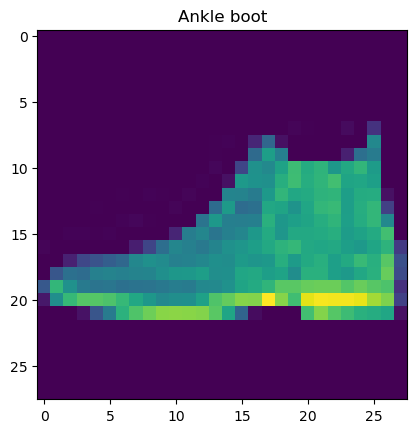

In [48]:
print(f"All probabilities : {y_proba.round(2)}")

plt.imshow(x_test[0])
plt.title(class_names[y_fashion_test[0]])
plt.show()